<h1 style='color:purple' align='left'>Data Science Regression Project: Predicting Home Prices in Bangalore</h1>

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1=df.drop(['availability','area_type','balcony','society'],axis=1)
df1
#Drop the assumed unnecessary column from the table

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [6]:
#Handling Null Values 
df1.isna

<bound method DataFrame.isna of                        location       size total_sqft  bath   price
0      Electronic City Phase II      2 BHK       1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                      Kothanur      2 BHK       1200   2.0   51.00
...                         ...        ...        ...   ...     ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00
13316             Richards Town      4 BHK       3600   5.0  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00
13319              Doddathoguru      1 BHK        550   1.0   17.00

[13320 rows x 5 columns]>

In [7]:
#Handling Null Values 
df1.isnull().sum()
#As our total rows are 13320 & null values are max 73 rows ,this is very minute so we can drop this row 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2=df1.dropna()
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [9]:
df2.shape
#Here earlier row was 13320 & after removing the null values it is 13246 ,so its still a good dataset

(13246, 5)

In [10]:
df2.isnull().sum()
#Here No NA values are there as we have removed them all in previous dropna operations

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2['size'].unique()
#AS we can see here some of the value in column is named with BHK suffix & some of them are with Bedroom suffix
#So we need to add anothr column to handle these data differences

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df2['BHK']=df2['size'].apply( lambda x:int(x.split(' ')[0]))

In [13]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df2['BHK'].unique()
#Here we can see there is 27 & 43 bedroom home ,which is kinda looks like error to me ,so we will remove that

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df2[df2.BHK >20] 

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
_df=pd.DataFrame(df2['total_sqft'].unique())
_df1=_df.to_string()
_df1
#Here we can see our sqft is avaible with different kind of format like 
# 1120 
# 1120-1145 
# 4125 perch
# 1000 sq. meter
# 1100 sq.yards
# 5.31 Acres
# 24 Guntha
# 1500 cents

#So we need to handle this column

'                      0\n0                  1056\n1                  2600\n2                  1440\n3                  1521\n4                  1200\n5                  1170\n6                  2732\n7                  3300\n8                  1310\n9                  1020\n10                 1800\n11                 2785\n12                 1000\n13                 1100\n14                 2250\n15                 1175\n16                 1180\n17                 1540\n18                 2770\n19                  600\n20                 1755\n21                 2800\n22                 1767\n23                  510\n24                 1250\n25                  660\n26                 1610\n27                 1151\n28                 1025\n29          2100 - 2850\n30                 1075\n31                 1760\n32                 1693\n33                 1925\n34                  700\n35                 1070\n36                 1724\n37                 1290\n38                 1143\

In [17]:
#Create a function to check the data is flaot or not 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3_float=df2[~df2['total_sqft'].apply(is_float)]
df3_float

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [19]:
def convert_sqft_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
convert_sqft_num('231')

231.0

In [21]:
df3=df2.copy()

In [22]:
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_num)

In [23]:
df3.head(5)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
df4_float=df3[df3['total_sqft'].apply(is_float)]
df4_float

#Now after removing non float value we have total 13246 rows 

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [25]:
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [26]:
df4=df3.copy()
df4

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [27]:
df4['Price_Per_Sqft']=df4['price']*100000/df4['total_sqft']
df4

,location,size,total_sqft,bath,price,BHK,Price_Per_Sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [28]:
df4.location.nunique()
#Here we need to handle location column 
# But as we can see there are 1304 location features available in location column
#So its called a dimesnionality curse

1304

In [29]:
#Remove Space in the starting & end of the word by using STRIP function

In [30]:
df4.location=df4.location.apply(lambda x: x.strip())

In [31]:
df4

,location,size,total_sqft,bath,price,BHK,Price_Per_Sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [32]:
Location_status=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [33]:
Location_status

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [34]:
loc_less_10=Location_status[Location_status<=10]
loc_less_10
#So total 1052 rows are there with less than or equal to 10 
#So we can assign them other column

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [35]:
df4.location=df4.location.apply(lambda x:'Others' if x in loc_less_10 else x)

In [36]:
df4.location.nunique()
#So here we have 242 locations which we can do one hot encoding 

242

In [37]:
df4.BHK.sort_values(ascending=False)

4684     43
1718     27
3379     19
11559    18
3609     16
         ..
10526     1
11481     1
7724      1
10527     1
13319     1
Name: BHK, Length: 13246, dtype: int64

In [38]:
df4.loc[4684]
# Here we can see for 2400 sqft we have 43 size bedroom which is 55sqft per bedroom 
# Which is practically impossible
#So these are the outliers we need to remove from the datasets

location          Munnekollal
size               43 Bedroom
total_sqft             2400.0
bath                     40.0
price                   660.0
BHK                        43
Price_Per_Sqft        27500.0
Name: 4684, dtype: object

<h2 style="color:blue">Outlier Removal Using Business Logic</h2>

**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [39]:
#So we need to go to our business manager that what is the typical sqft for 1 bed room 
#lets say ,if it is 300 sqft/bed room 

In [40]:
df4[(df4.total_sqft/df4.BHK)<300]

,location,size,total_sqft,bath,price,BHK,Price_Per_Sqft
9,Others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Others,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Others,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


<h2 style="color:blue">Outlier Removal Using Business Logic</h2>

**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [41]:
df5=df4[~((df4.total_sqft/df4.BHK)<300)]
df5

# '~' is called negate term will give the opposite / remaining data of the function sentence 

,location,size,total_sqft,bath,price,BHK,Price_Per_Sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


<h2 style="color:blue">Outlier Removal Using Standard Deviation and Mean</h2>

In [42]:
df5.Price_Per_Sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_Per_Sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**`

In [43]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for dis_loc,subdf in df.groupby ('location'): 
        #Here dis_loc is the distinct location & subdf is the df table for that match location 
        m=np.mean(subdf.Price_Per_Sqft) 
        std=np.std(subdf.Price_Per_Sqft)
        reduced_df=subdf[(subdf.Price_Per_Sqft>(m-std))& (subdf.Price_Per_Sqft<=(m+std))] 
        #check price per sqft should be within m-std & m+std
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
        #append the reduced df into df_out empty dataframe
    return df_out
df6=remove_outliers(df5)
df6.shape

(10241, 7)

**Here we remove the outlier which has high or low price per sqft area**

In [44]:
df6.Price_Per_Sqft.describe()

count    10241.000000
mean      5657.702572
std       2266.476980
min       1250.000000
25%       4244.762955
50%       5172.413793
75%       6426.099852
max      24509.803922
Name: Price_Per_Sqft, dtype: float64

**Now we need to check the property price of 3 BHK is more than 2BHK appartment or not ,for the same area**

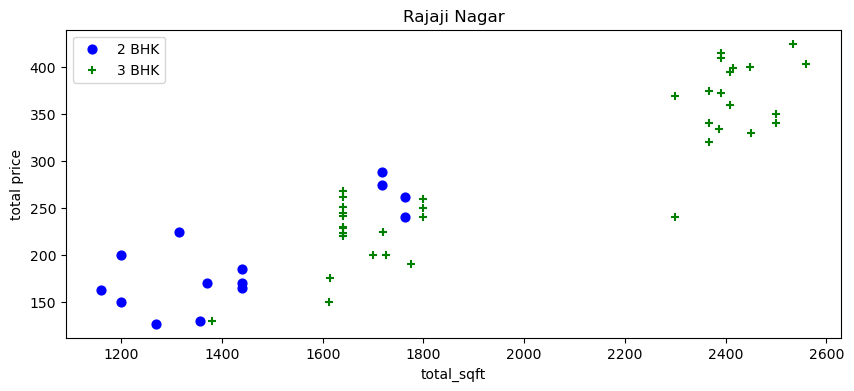

In [45]:
def plt_scatter(df,location):
    bhk2_df=df[(df.location==location)&(df.BHK==2)]
    bhk3_df=df[(df.location==location)&(df.BHK==3)]
    plt.figure(figsize=(10, 4))
    plt.scatter(bhk2_df.total_sqft,bhk2_df.price,color='blue',label='2 BHK',s=40)
    plt.scatter(bhk3_df.total_sqft,bhk3_df.price,color='green',marker='+',label='3 BHK',s=40)
    plt.xlabel('total_sqft')
    plt.ylabel('total price')
    plt.title(location)
    plt.legend()
plt_scatter(df6,'Rajaji Nagar')

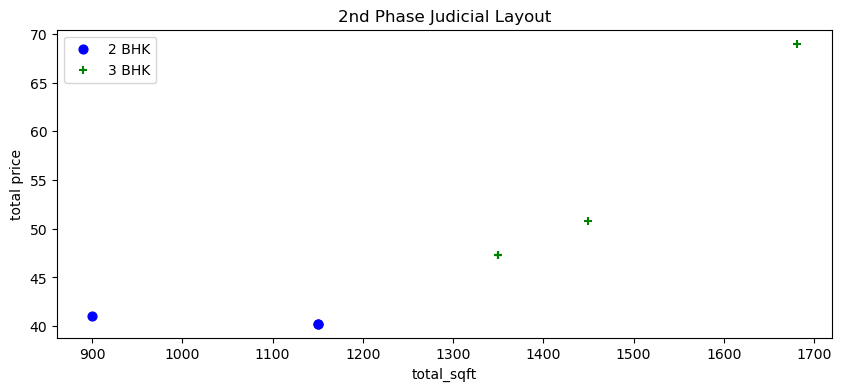

In [87]:
def plt_scatter(df,location):
    bhk2_df=df[(df.location==location)&(df.BHK==2)]
    bhk3_df=df[(df.location==location)&(df.BHK==3)]
    plt.figure(figsize=(10, 4))
    plt.scatter(bhk2_df.total_sqft,bhk2_df.price,color='blue',label='2 BHK',s=40)
    plt.scatter(bhk3_df.total_sqft,bhk3_df.price,color='green',marker='+',label='3 BHK',s=40)
    plt.xlabel('total_sqft')
    plt.ylabel('total price')
    plt.title(location)
    plt.legend()
plt_scatter(df6,'2nd Phase Judicial Layout')

**From this scatter plot what we found is for Rajaji nagar location,for same sqft house in some cases the price of 2bhk appartments are higher than the 3bhk appartments,So wee need to remove some of these outliers**

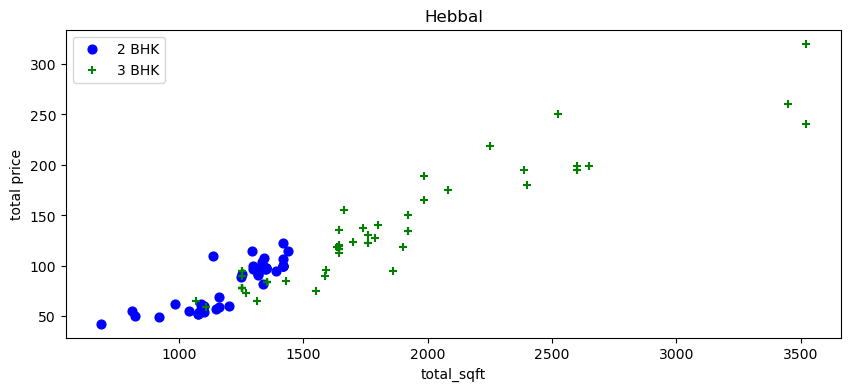

In [46]:
plt_scatter(df6,'Hebbal')

#Here also we can see some of the 3BHK appartments are higher than the 3bhk appartments for same sqft area

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [47]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                            'mean':np.mean(bhk_df.Price_Per_Sqft),
                            'std':np.std(bhk_df.Price_Per_Sqft),
                            'count':bhk_df.shape[0]             
                            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.Price_Per_Sqft<stats['mean']].index.values)
    return df.drop(exclude_indices,axis='index')
df7=remove_bhk_outlier(df6)
df7       

,location,size,total_sqft,bath,price,BHK,Price_Per_Sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10230,Yeshwanthpur,2 BHK,1195.0,2.0,100.0,2,8368.200837
10231,Yeshwanthpur,3 BHK,1692.0,3.0,108.0,3,6382.978723
10233,Yeshwanthpur,6 Bedroom,2500.0,5.0,185.0,6,7400.000000
10238,Yeshwanthpur,3 BHK,1855.0,3.0,135.0,3,7277.628032


**So Now we will check the effectiveness of this code by plotting scatter plot here**

<h3 style='color:green'>Before and after outlier removal: Rajaji Nagar</h3>

<img src="rajaji_nagar_outliers.png"></img>

<h3 style='color:green'>Before and after outlier removal: Hebbal</h3>

<img src="hebbal_outliers.png"></img>

**Now we can see the wonders ,Now this is very unlikely that price of 2bhk is greater than the price of 3BHK for same location & same sqft**

Text(0, 0.5, 'Count')

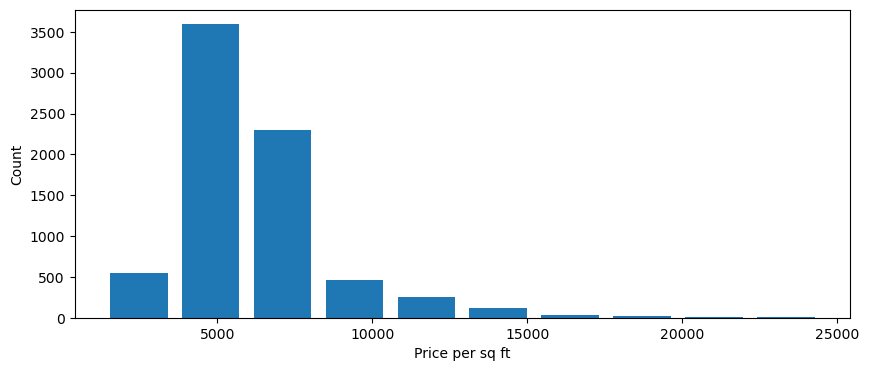

In [48]:
plt.figure(figsize=(10,4))
plt.hist(df7.Price_Per_Sqft,rwidth=0.8)
plt.xlabel('Price per sq ft')
plt.ylabel('Count')

#Here we can see that most of the datsets are in 5000 sqft range 

Text(0, 0.5, 'Count')

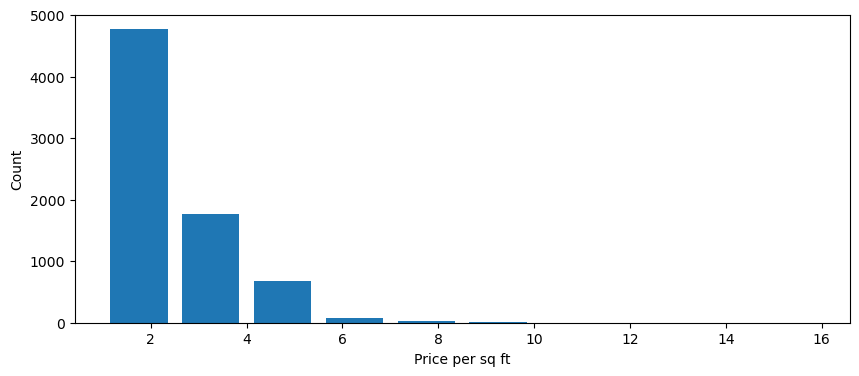

In [49]:
plt.figure(figsize=(10,4))
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel('Price per sq ft')
plt.ylabel('Count')

#Here we can see that most of the datsets are in 5000 sqft range 

**Now we will check the bathrooms which are which are greater than the bedroom+2 number,and we need to remove those**

In [86]:
df8=df7[~(df7.bath>(df7.BHK+2))]
df8.location

0        1st Block Jayanagar
1        1st Block Jayanagar
2        1st Block Jayanagar
3        1st Block Jayanagar
4        1st Block Jayanagar
                ...         
10230           Yeshwanthpur
10231           Yeshwanthpur
10233           Yeshwanthpur
10238           Yeshwanthpur
10239           Yeshwanthpur
Name: location, Length: 7325, dtype: object

**Now we can drop unnecesary column as we are about to start machine learning training**

In [51]:
df9=df8.drop(['size','Price_Per_Sqft'],axis=1)

In [52]:
df9.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


**Now we need to convert the location column from text to numeric**

In [53]:
df9.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [54]:
dummies=pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df10=pd.concat([df9,dummies.drop('Others',axis='columns')],axis=1) #To handle multi colinearity drop 1 column
df10.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df10

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,Yeshwanthpur,1195.0,2.0,100.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10231,Yeshwanthpur,1692.0,3.0,108.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,Yeshwanthpur,2500.0,5.0,185.0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,Yeshwanthpur,1855.0,3.0,135.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df11=df10.drop('location',axis='columns')
df11.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df11.shape

(7325, 245)

### **Predict score of 1 model (linear regression)**

In [59]:
X=df11.drop('price',axis='columns')
y=df11.price

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [61]:
from sklearn.linear_model import LinearRegression
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,y_train)
lin_reg_model.score(X_test,y_test)

0.8527000951651651

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

**Kfold will divide the entire datatset into numer of parts as given in input**

In [63]:
cv=KFold(10)
results=cross_val_score(lin_reg_model,X,y,cv=cv)
results
print(results)
print(np.mean(results))
print(np.min(results))
print(np.max(results))

[ 3.95305029e-01 -3.19492381e+16 -4.40949362e+14 -1.85614562e+16
  4.27049567e-01  6.21777725e-01  8.11509416e-01  7.40399011e-01
  5.65978984e-01  6.36579809e-01]
-5095164372564363.0
-3.194923812830044e+16
0.8115094159840762


**Shufflesplit will first shuffle entire data ,then will divide into train & test ,again it will shufflw and split**

**like this it will do number of times as per given n_splits input**

`
It is done to ensure that order of datasets shouldnt affect the model
`

In [64]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
result2=cross_val_score(lin_reg_model, X, y, cv=cv)
print(result2)
print(np.mean(result2))
print(np.min(result2))
print(np.max(result2))

[0.83683414 0.88576038 0.86456858 0.84938811 0.86827334 0.86750015
 0.89040146 0.87380184 0.77753851 0.89087503]
0.8604941532619259
0.77753850821674
0.8908750292130201


## Use gridsearchCV to find best model with best hypertuned parameter

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

In [66]:
def find_best_model_using_GridsearchCV(X,y):
    model_params={'lin_reg':{'model':LinearRegression(),'params':{}},
                  #'log_reg':{'model':LogisticRegression(solver='liblinear',multi_class='auto'),'params':{'C':[1,5,10]}},
                  'Lasso':{'model':Lasso(),'params':{'alpha':[1,2],'selection':['random','cyclic']}},
                  #'svm':{'model':SVC(gamma='auto'),'params':{'C':[1,10,20],'kernel':['rbf','linear']}},
                  'dec_tree_regressor':{'model':DecisionTreeRegressor(),'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}},# for continous data 
                  #'dec_tree_classfier':{'model':DecisionTreeClassifier(),'params':{'criterion':['gini','entropy']}},                               # for discrete data /classfication problem
                  #'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,5,10]}},
                  #'Na_ba gaussian':{'model':GaussianNB(),'params':{}},
                  #'Na_ba MultiNomial':{'model':MultinomialNB(),'params':{}},
                 }
    #Iterate all models & paramters
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
    for model_name,mod_pa in model_params.items():
        classf=GridSearchCV(mod_pa['model'],mod_pa['params'],cv=cv,return_train_score=False)
        classf.fit(X,y)
        scores.append({'model':model_name,'best_score':classf.best_score_,'best_parameter':classf.best_params_})
    return pd.DataFrame(scores)

In [67]:
find_best_model_using_GridsearchCV(X,y)

,model,best_score,best_parameter
0,lin_reg,0.856215,{}
1,Lasso,0.696629,"{'alpha': 1, 'selection': 'random'}"
2,dec_tree_regressor,0.700094,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


**Based on above results we can say that LinearRegression gives the best score. Hence we will use that.**

### Predict Based on linear regression model 

In [68]:
lin_reg_model.predict('1st Phase JP Nagar',1000, 2, 2)
#we have to try some other mthod
#Here we have to predict the array instead of normal digit input 
# as we have 244 columns so we have to feed array

TypeError: LinearModel.predict() takes 2 positional arguments but 5 were given

In [69]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0] #It finds index of location parameter in a list of column name
    x_array = np.zeros(len(X.columns)) #create an array filled with zeros, which has lenth of 244 ,which is number of column available
    x_array[0] = sqft
    x_array[1] = bath
    x_array[2] = bhk # It assign sqft,bath,bhk values to corresponding positions in X_array
    if loc_index >= 0:
        x_array[loc_index] = 1

    return lin_reg_model.predict([x_array])[0] # 0 - is to get exact number from the arrays


#So here we have created a x_array from the location,sqft,bath & bhk input and then we feed it into the prediction model

In [70]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

84.20996081642329

In [76]:
predict_price('2nd Phase Judicial Layout',500, 1, 2)

-16.522021248259186

In [74]:
predict_price('Indira Nagar',500, 2, 2)

147.0343107940792

In [ ]:
predict_price('Indira Nagar',1000, 2, 3) #for same sqft if the bhk is higher the price is lower

<h2 style='color:blue'>Export the tested model to a pickle file</h2>

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lin_reg_model,f)

**Export location and column information from (predict price function )to a file that will be useful later on in our prediction application**

In [ ]:
import json
columns={'data_columns':[col.lower() for col in X.columns ]} #X.columns is from predict price function
with open('columns.json','w') as f:
    f.write(json.dumps(columns))